[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 8"


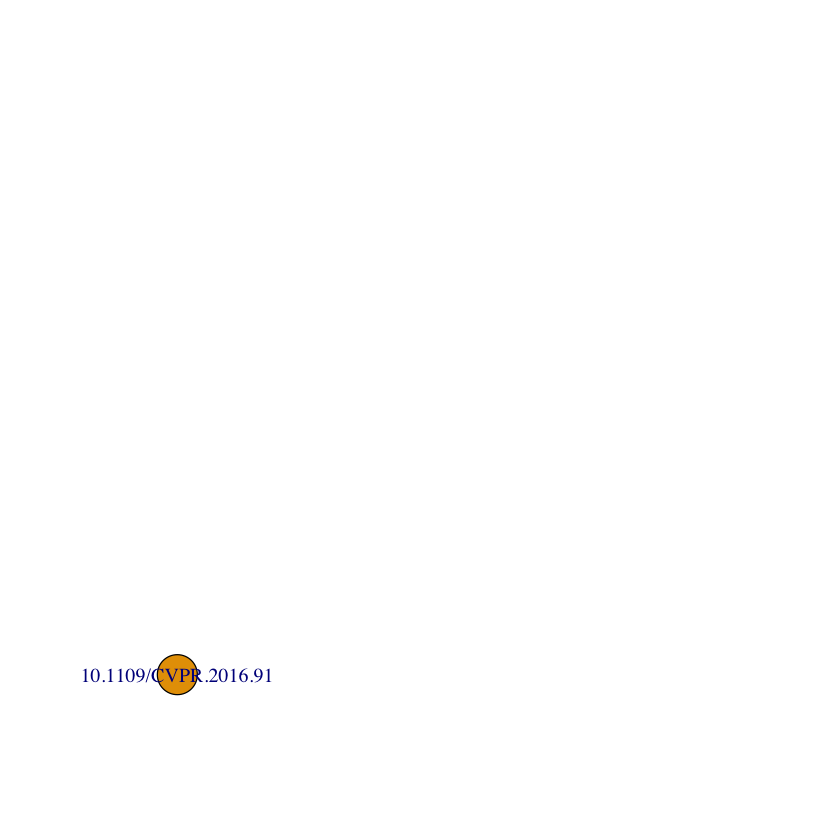

In [69]:
library(igraph)
library(citationchaser)

# Function to fetch backward citations
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$data$doi
  # Filter out any NULL or NA DOIs
  refs <- refs[!is.na(refs)]
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}

# Define the DOI of the paper you're interested in
initial_doi <- "10.1109/CVPR.2016.91"

# Define your token from Lens.org
token <- "HaHmC5dTgiEs3zQ9fHuFjTgdKoo9ehvxVlyTw0gi85L4RVnvFluQ"

# Fetch the backward citations for the initial paper
initial_citations <- get_backward_citations(initial_doi, token)

# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  
  # For each secondary citation, check if it's already in the graph
  for (sec_cite in secondary_citations) {
    if (sec_cite %in% V(g)$name) {
      # If the secondary citation is already in the graph, just add an edge
      g <- add_edges(g, c(cite, sec_cite))
    } else {
      # If not, add the secondary citation to the graph and then add an edge
      g <- add_vertices(g, 1, name = sec_cite)
      g <- add_edges(g, c(cite, sec_cite))
    }
  }
}

# Now, g is your desired directed network
plot(g)


In [70]:
initial_citations <- get_backward_citations(initial_doi, token)
print(initial_citations)


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 8"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 8"
NULL


In [71]:
for (cite in initial_citations) {
  secondary_citations <- get_backward_citations(cite, token)
  print(secondary_citations)
}


In [72]:
get_backward_citations <- function(doi, token, limit = 10) {
  refs <- get_refs(doi, get_records = 'references', token = token)$display$doi
  # Limit to the desired number of citations
  refs <- refs[1:min(limit, length(refs))]
  return(refs)
}


In [73]:
initial_citations <- get_backward_citations(initial_doi, token)
print(initial_citations)


[1] "Input record list:"
[1] "10.1109/CVPR.2016.91"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/CVPR.2016.91\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 8"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "049-317-239-158-314"
[1] "Remaining requests = 7"
 [1] "10.1007/s11263-014-0733-5"    "10.1109/tpami.2009.167"      
 [3] NA                             "10.1007/s11263-013-0620-5"   
 [5] NA                             "10.1109/icip.2002.1038171"   
 [7] "10.1007/978-3-319-10578-9_23" "10.1109/cvpr.2005.177"       
 [9] "10.1109/iccv.2009.5459303"    "10.1007/978-3-642-33712-3_25"


[1] "Input record list:"
[1] "10.1007/s11263-014-0733-5"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1007/s11263-014-0733-5\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 8"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "004-193-609-931-550"
[1] "Remaining requests = 7"
[1] "Input record list:"
[1] "10.1109/tpami.2009.167"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1109/tpami.2009.167\"]\n\t\t}\n\t},\n\t\"size\":500\n}"
[1] "Input request executed."
[1] "Remaining requests = 9"
[1] "Results converted to df from JSON output:"
[1] 1
[1] "Returned records from input request:"
[1] "007-316-191-175-159"
[1] "Remaining requests = 8"
[1] "Input record list:"
[1] "10.1007/s11263-013-0620-5"
[1] "Input article request:"
[1] "{\n\t\"query\": {\n\t\t\"terms\": {\n\t\t\t\"doi\": [\"10.1007/s11263-013-062

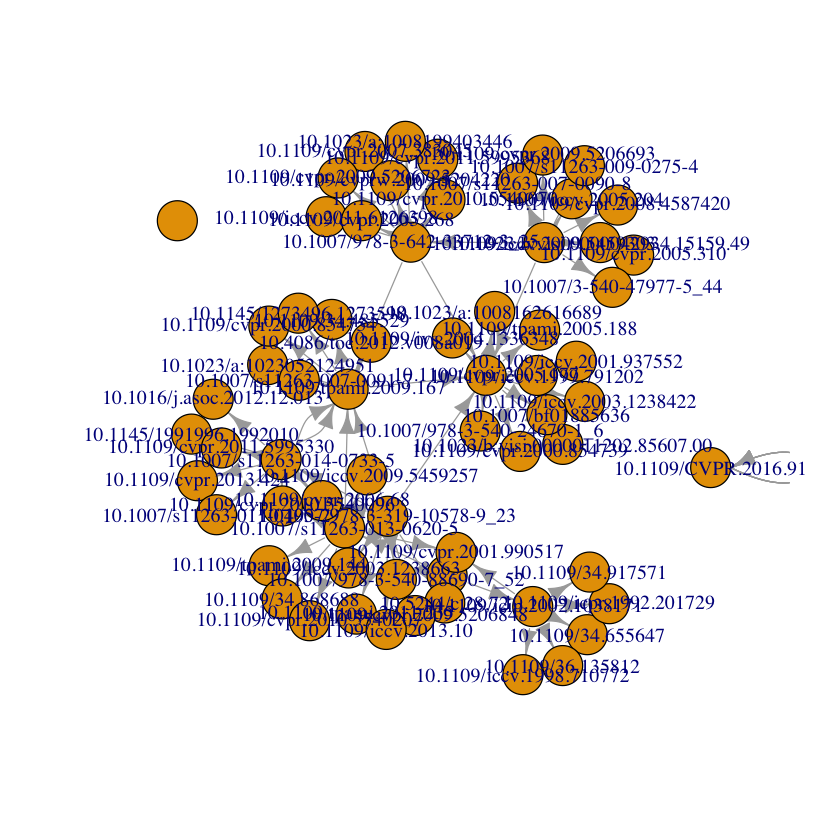

In [74]:
# Create an empty graph
g <- graph.empty(directed = TRUE)

# Add the initial paper to the graph
g <- add_vertices(g, 1, name = initial_doi)

# Add the initial backward citations to the graph and edges from the initial paper to these citations
g <- add_vertices(g, length(initial_citations), name = initial_citations)
g <- add_edges(g, c(rep(initial_doi, length(initial_citations)), initial_citations))

# Now, for each of the initial backward citations, fetch their backward citations
for (cite in initial_citations) {
  if (!is.na(cite)) { # Check if the citation is not NA
    secondary_citations <- get_backward_citations(cite, token)
    
    # For each secondary citation, check if it's already in the graph
    for (sec_cite in secondary_citations) {
      if (!is.na(sec_cite) && sec_cite %in% V(g)$name) { # Check if the secondary citation is not NA and is already in the graph
        # If the secondary citation is already in the graph, just add an edge
        g <- add_edges(g, c(cite, sec_cite))
      } else if (!is.na(sec_cite)) {
        # If not, add the secondary citation to the graph and then add an edge
        g <- add_vertices(g, 1, name = sec_cite)
        g <- add_edges(g, c(cite, sec_cite))
      }
    }
  }
}

# Now, g is your desired directed network
plot(g)
